In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import minimize

## free parameters (have value for now)

In [2]:
H0 = 70  # Hubble constant in km/s/Mpc
Omega_M = 0.3  # Matter density parameter
Omega_L = 0.7  # Dark energy density parameter
w = -1  # Equation of state parameter for dark energy
M = -18.3  # Absolute magnitude supernova type 1a    this is a free paramters, dont know what this means
c = 3e5 # speed of light

In [3]:
def H(z, H0, Omega_M, Omega_L, w):
    return H0 * np.sqrt(Omega_M * (1 + z)**3 + Omega_L * (1 + z)**(3 * (1 + w)))

def comoving_distance(z, H0, Omega_M, Omega_L, w):
    distances = []
    for z_val in z:
        integral, _ = integrate.quad(
            lambda z_prime: c / H(z_prime, H0, Omega_M, Omega_L, w), 0, z_val
        )
        distances.append(integral)
    return np.array(distances)

def luminosity_distance(z, H0, Omega_M, Omega_L, w):
    return (1 + z) * comoving_distance(z, H0, Omega_M, Omega_L, w)

def angular_diameter_distance(z, H0, Omega_M, Omega_L, w):
    return luminosity_distance(z, H0, Omega_M, Omega_L, w) / ((1 + z) ** 2)

def chi_squared(params):
    a, b = params
    model = a + b * log_term
    chi2 = np.sum(((model - log_L)**2) / (b**2 * (dEpeak / Epeak)**2 + (dPbolo / Pbolo)**2))
    return chi2

## part 1

In [4]:
base_path = os.path.expanduser("~/Desktop/UGent/master/master 1/Semester 1/kosmologie en galaxievorming/project 1")

data = np.loadtxt(f'{base_path}/lcparam_full_long_zhel.txt', skiprows=1, usecols=(1, 4))

# Extract redshift (z) and apparent magnitude (mb)
z = data[:, 0]
mb = data[:, 1]

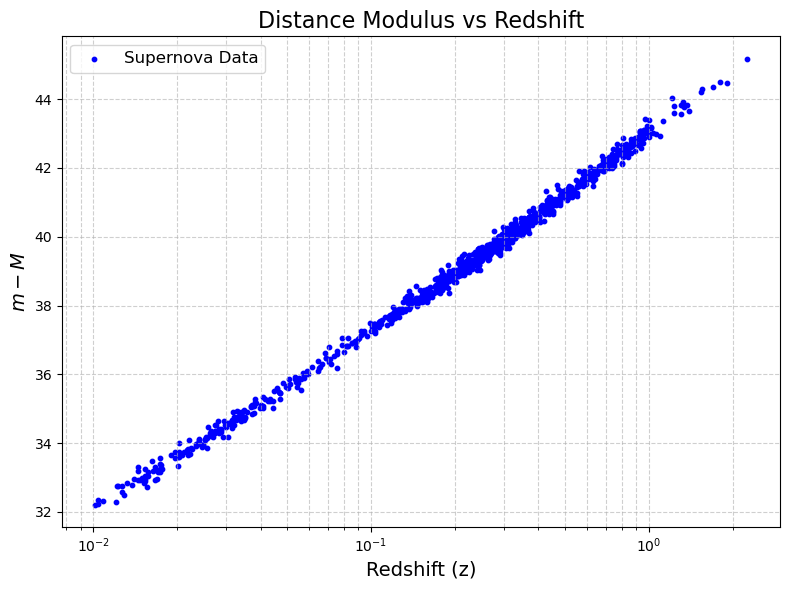

In [5]:
distance_modulus = mb - M

# Plot m - M vs z
plt.figure(figsize=(8, 6))
plt.scatter(z, distance_modulus, s=10, c='blue', label='Supernova Data')
plt.xlabel('Redshift (z)', fontsize=14)
plt.ylabel(r'$m - M$', fontsize=14)
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title('Distance Modulus vs Redshift', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

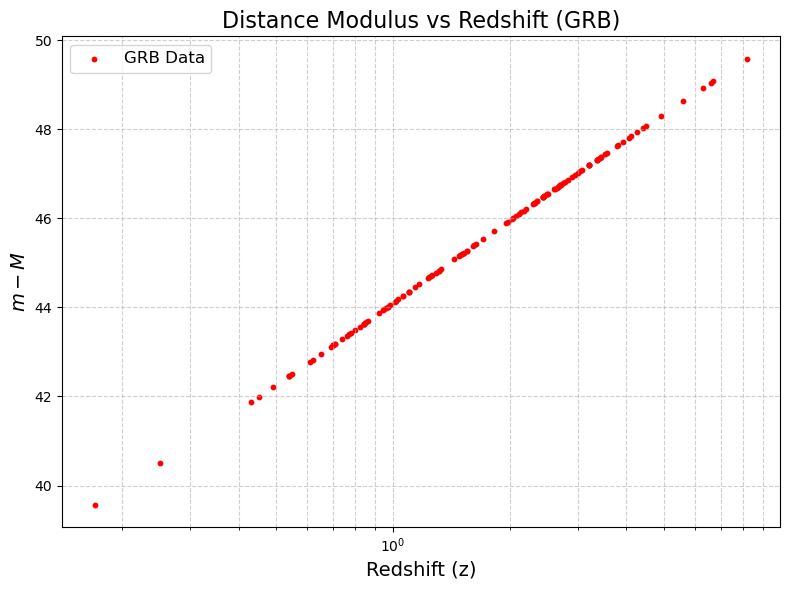

Fitted parameters: a = 52.1630, b = 2.0212
6.435135153269809e+52


In [10]:
base_path = os.path.expanduser("~/Desktop/UGent/master/master 1/Semester 1/kosmologie en galaxievorming/project 1")
data = np.loadtxt(f'{base_path}/GRBdata.txt', skiprows=1, usecols=(1, 2, 3, 4, 5))

# Extract columns: z, Pbolo, dPbolo, Epeak, dEpeak
z, Pbolo, dPbolo, Epeak, dEpeak = data.T

dL = luminosity_distance(z, H0, Omega_M, Omega_L, w)  # in Mpc
L = 4 * np.pi * (dL * 3.085677581e24)**2 * Pbolo  # Convert dL to cm, compute L in erg/s
avg_L = np.mean(L)
log_L = np.log10(L)

# Logarithmic term for fitting
log_term = np.log10((Epeak * (1 + z)) / 300)

initial_params = [1, 1]
fit_result = minimize(chi_squared, initial_params, method='Nelder-Mead')
a_fit, b_fit = fit_result.x

# Distance modulus calculation
dL_GRB = np.sqrt(L / (4 * np.pi * Pbolo)) / 3.085677581e24  # dL in Mpc
distance_modulus = 25 + 5 * np.log10(dL_GRB)

# Plot m - M vs. z
plt.figure(figsize=(8, 6))
plt.scatter(z, distance_modulus, s=10, c='red', label='GRB Data')
plt.xlabel('Redshift (z)', fontsize=14)
plt.ylabel(r'$m - M$', fontsize=14)
plt.xscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title('Distance Modulus vs Redshift (GRB)', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Print the fit results
print(f"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}")
print(avg_L)